In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [63]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
# Set the API base URL
url = url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | luanda
Processing Record 3 of Set 1 | russkaya polyana
Processing Record 4 of Set 1 | putyatino
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | amatitan
Processing Record 9 of Set 1 | dauphin
Processing Record 10 of Set 1 | cabo san lucas
Processing Record 11 of Set 1 | jinzhou
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | richards bay
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | minbu
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | leh
Processing Record 22 of Set 

In [65]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [66]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-18.58,78,20,4.63,CA,1667702178
1,luanda,-8.8368,13.2343,25.00,88,75,2.06,AO,1667702525
2,russkaya polyana,49.4170,31.9201,2.91,83,89,3.37,UA,1667702526
3,putyatino,54.1600,41.1169,0.58,78,100,1.80,RU,1667702527
4,kapaa,22.0752,-159.3190,28.99,78,40,7.20,US,1667702425


In [68]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-18.58,78,20,4.63,CA,1667702178
1,luanda,-8.8368,13.2343,25.00,88,75,2.06,AO,1667702525
2,russkaya polyana,49.4170,31.9201,2.91,83,89,3.37,UA,1667702526
3,putyatino,54.1600,41.1169,0.58,78,100,1.80,RU,1667702527
4,kapaa,22.0752,-159.3190,28.99,78,40,7.20,US,1667702425


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

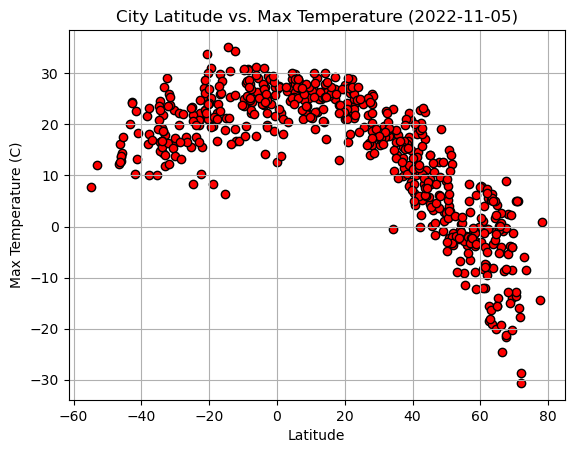

In [3]:
# Build scatter plot for latitude vs. temperature
temp = city_data_df["Max Temp"]
lat = city_data_df["Lat"]
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-11-05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

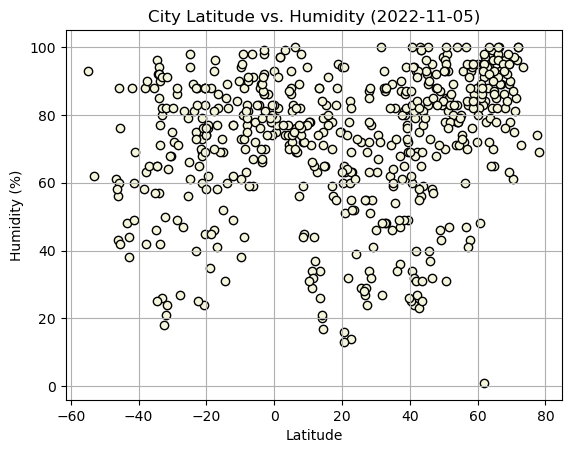

In [4]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
lat = city_data_df["Lat"]
plt.scatter(lat, humidity, marker="o", facecolors="beige", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-11-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

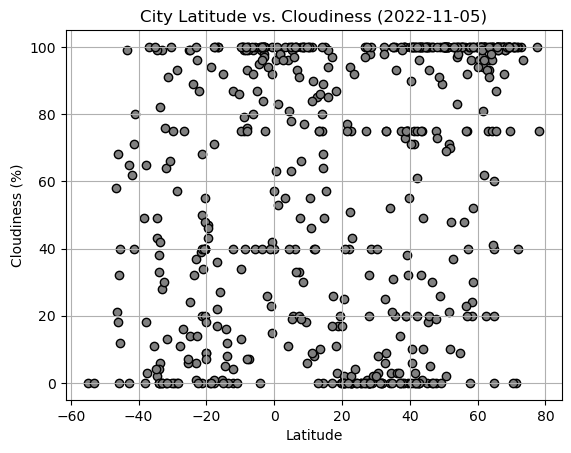

In [5]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
lat = city_data_df["Lat"]
plt.scatter(lat, cloudiness, marker="o", facecolors="gray", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-11-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

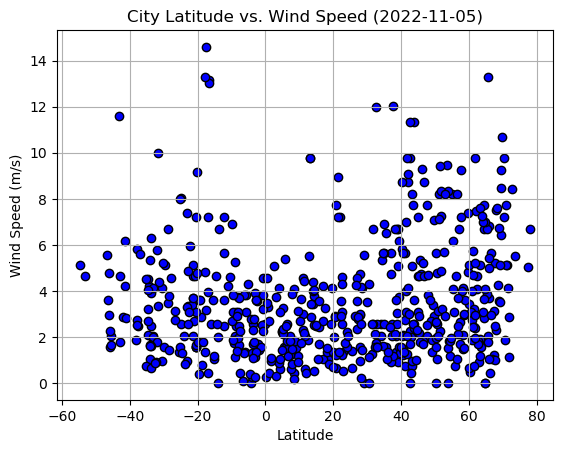

In [6]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
lat = city_data_df["Lat"]
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-11-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-18.58,78,20,4.63,CA,1667702178
2,russkaya polyana,49.4170,31.9201,2.91,83,89,3.37,UA,1667702526
3,putyatino,54.1600,41.1169,0.58,78,100,1.80,RU,1667702527
4,kapaa,22.0752,-159.3190,28.99,78,40,7.20,US,1667702425
6,amatitan,20.8333,-103.7167,16.64,51,0,1.31,MX,1667702528


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,luanda,-8.8368,13.2343,25.00,88,75,2.06,AO,1667702525
5,ushuaia,-54.8000,-68.3000,7.81,93,0,5.14,AR,1667702439
10,atuona,-9.8000,-139.0333,25.05,73,13,6.91,PF,1667702529
11,rikitea,-23.1203,-134.9692,21.92,75,37,7.37,PF,1667702425
12,richards bay,-28.7830,32.0377,19.82,86,57,3.48,ZA,1667702530


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8722099195373746


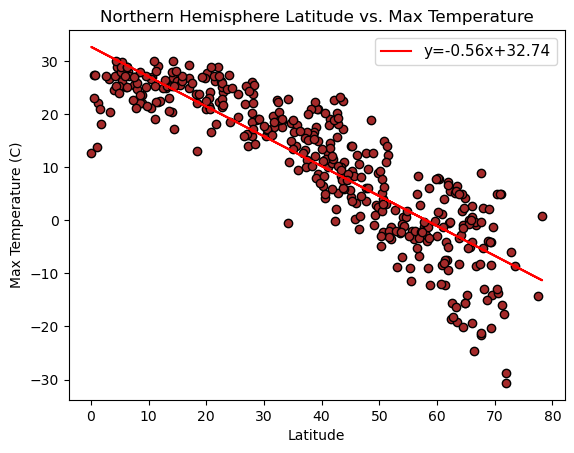

In [8]:
# Linear regression on Northern Hemisphere
north_temp = northern_hemi_df['Max Temp']
north_lat = northern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(north_lat, north_temp)

# Create equation of line
lat_fit = lat_slope * north_lat + lat_int

# Plot the linear model on top of scatter plot 
y = north_temp
x =  north_lat
plt.scatter(north_lat,north_temp, marker="o", facecolors="brown", edgecolors="black")
plt.plot(north_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Northern Hemisphere Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

The r-value is: 0.5632973208053259


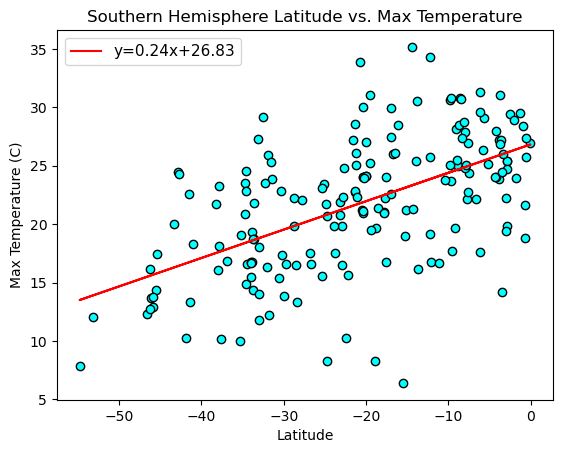

In [164]:
# Linear regression on Southern Hemisphere
south_humidity = southern_hemi_df['Max Temp']
south_lat = southern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(south_lat, south_humidity)

# Create equation of line
lat_fit = lat_slope * south_lat + lat_int

# Plot the linear model on top of scatter plot 
y = south_humidity
x =  south_lat
plt.scatter(south_lat,south_humidity, marker="o", facecolors="cyan", edgecolors="black")
plt.plot(south_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Southern Hemisphere Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and max temperature in the northern hemisphere while the southern hemisphere has a moderate positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.30276465259847485


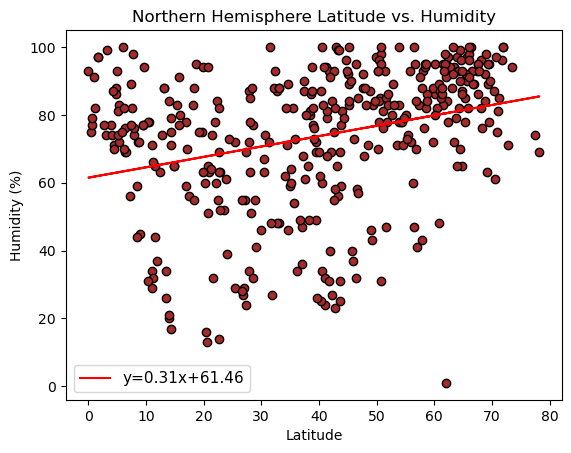

In [9]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_humidity = northern_hemi_df['Humidity']
north_lat = northern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(north_lat, north_humidity)

# Create equation of line
lat_fit = lat_slope * north_lat + lat_int

# Plot the linear model on top of scatter plot 
y = north_humidity
x =  north_lat
plt.scatter(north_lat,north_humidity, marker="o", facecolors="brown", edgecolors="black")
plt.plot(north_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

The r-value is: 0.2904161818345931


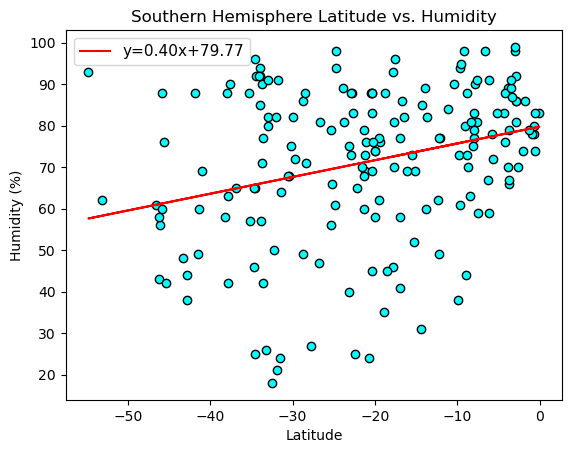

In [167]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_humidity = southern_hemi_df['Humidity']
south_lat = southern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(south_lat, south_humidity)

# Create equation of line
lat_fit = lat_slope * south_lat + lat_int

# Plot the linear model on top of scatter plot 
y = south_humidity
x =  south_lat
plt.scatter(south_lat,south_humidity, marker="o", facecolors="cyan", edgecolors="black")
plt.plot(south_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres have weak positive correlations between latitude and humidity percent.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.28820095104932675


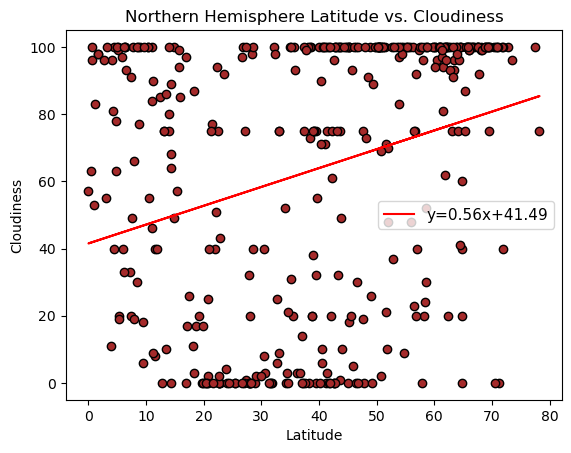

In [10]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_cloud = northern_hemi_df['Cloudiness']
north_lat = northern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(north_lat, north_cloud)

# Create equation of line
lat_fit = lat_slope * north_lat + lat_int

# Plot the linear model on top of scatter plot 
y = north_cloud
x =  north_lat
plt.scatter(north_lat,north_cloud, marker="o", facecolors="brown", edgecolors="black")
plt.plot(north_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

The r-value is: 0.36187849822561824


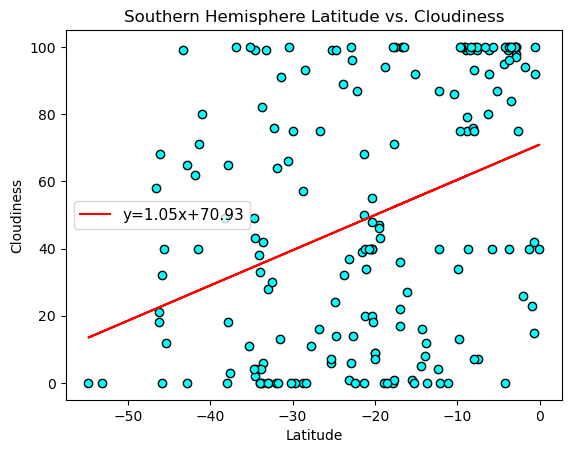

In [169]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_cloud = southern_hemi_df['Cloudiness']
south_lat = southern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(south_lat, south_cloud)

# Create equation of line
lat_fit = lat_slope * south_lat + lat_int

# Plot the linear model on top of scatter plot 
y = south_cloud
x =  south_lat
plt.scatter(south_lat,south_cloud, marker="o", facecolors="cyan", edgecolors="black")
plt.plot(south_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres have positive correlations between latitude and cloudiness. The southern hemisphere's correlation is stronger than then northern hemisphere's, but both correlations are fairly weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.28529848151931264


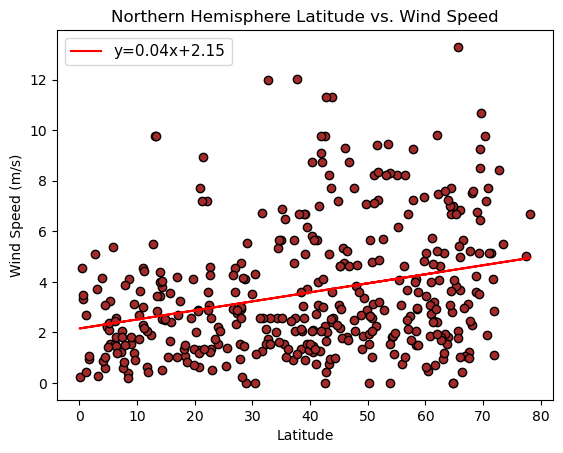

In [11]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
north_wind = northern_hemi_df['Wind Speed']
north_lat = northern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(north_lat, north_wind)

# Create equation of line
lat_fit = lat_slope * north_lat + lat_int

# Plot the linear model on top of scatter plot 
y = north_wind
x =  north_lat
plt.scatter(north_lat,north_wind, marker="o", facecolors="brown", edgecolors="black")
plt.plot(north_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

The r-value is: -0.14504004305149734


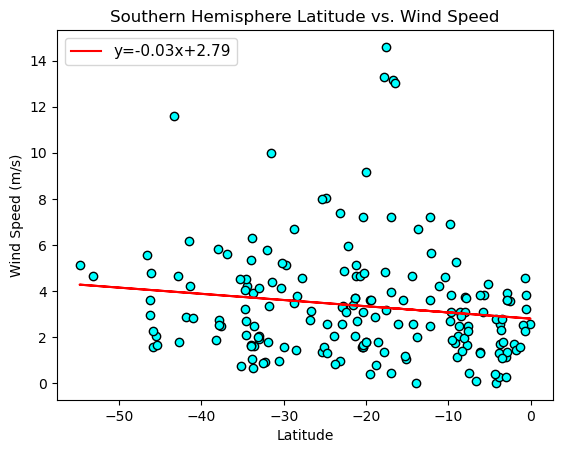

In [171]:
# Southern Hemisphere
# Southern Hemisphere
# Linear regression on Southern Hemisphere
south_wind = southern_hemi_df['Wind Speed']
south_lat = southern_hemi_df['Lat']
lat_slope, lat_int, lat_r, lat_p, lat_std_err = stats.linregress(south_lat, south_wind)

# Create equation of line
lat_fit = lat_slope * south_lat + lat_int

# Plot the linear model on top of scatter plot 
y = south_wind
x =  south_lat
plt.scatter(south_lat,south_wind, marker="o", facecolors="cyan", edgecolors="black")
plt.plot(south_lat,lat_fit,color='red', label='y={:.2f}x+{:.2f}'.format(lat_slope,lat_int))
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.legend(fontsize=11, loc='best')
print(f"The r-value is: {lat_r}")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere has a positive correlation between latitude and wind speed, while the southerbn hemisphere has a negative correlation. Both correlations are weak, but the northern hemisphere does have a stronger correlation than the southern hemisphere.